# SINP Project - 2024

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use(['science','notebook'])
import seaborn as so
# so.set_style('whitegrid')
# import plotly.express as px
# import plotly.graph_objects as go

from scipy.optimize import curve_fit

## 21.03.2024 - Malus law

In [3]:
df21031 = pd.read_excel('SINP_proj_data.xlsx', sheet_name='2103_1')
display(df21031)

,Angle (in degrees),Output Power (in micro W)
0,160,65.1
1,165,130.3
2,170,298.7
3,175,541.0
4,180,904.0
5,185,1251.0
6,190,1604.0
7,195,1886.0
8,200,2082.0
9,205,2162.0


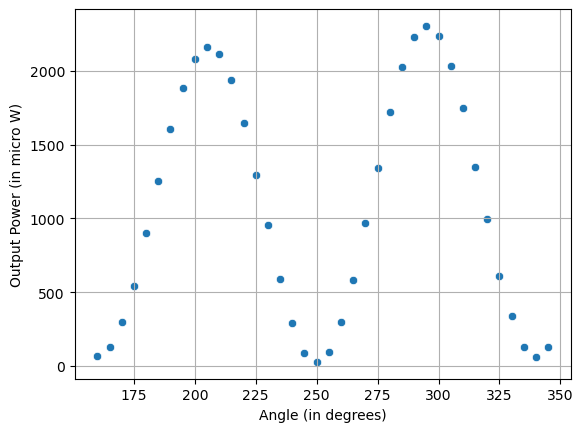

In [4]:
so.scatterplot(data=df21031, x='Angle (in degrees)', y='Output Power (in micro W)')
plt.grid()
plt.show()

Fitting function: $ f(\theta, a_0,I_0,\theta_1) = I_0 \left(\cos\dfrac{(a_0 \theta -\theta_1)\pi}{180} \right)^2 $

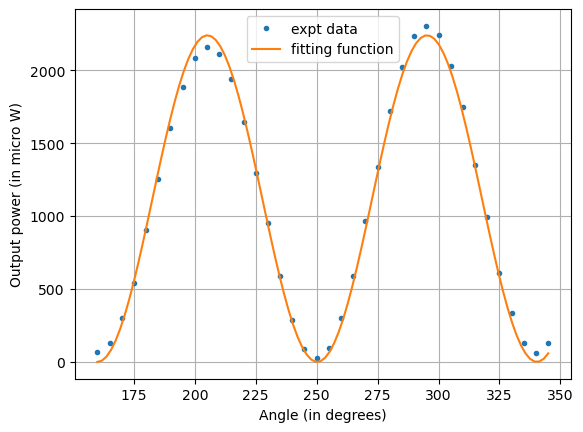

'$f(\theta, a_0,I_0,\theta_1) = I_0 \\left(\\cos\\dfrac{(a_0 \theta -\theta_1)\\pi}{180} \right)^2$'

array([1.99733695e+00, 2.23983688e+03, 2.29763828e+02])

In [5]:
def fitfn21031(th, a0, I0, th1):
    '''$f(\theta, a_0,I_0,\theta_1) = I_0 \left(\cos\dfrac{(a_0 \theta -\theta_1)\pi}{180} \right)^2$'''
    return I0*(np.cos((th*a0-th1)*np.pi/180))**2

ang = df21031['Angle (in degrees)'].to_numpy()
pout = df21031['Output Power (in micro W)'].to_numpy()

p_opt, p_err = curve_fit(fitfn21031, ang, pout, p0=[2,2400,240])
a01, I01, th1 = p_opt

plt.plot(ang, pout, 'o', ms=3, label='expt data')
ang1 = np.linspace(ang.min(), ang.max(), 100)
plt.plot(ang1, fitfn21031(ang1, a01, I01, th1), label='fitting function')
# plt.plot(ang, fitfn(ang, 2, 2300, 240), label='fitting function ideal')
plt.xlabel('Angle (in degrees)')
plt.ylabel('Output power (in micro W)')
plt.legend()
plt.grid()
plt.show()
display(fitfn21031.__doc__, p_opt)

## 21.03.2024 - Knife edge

In [6]:
from scipy.integrate import quad

Fitting function: $\quad f(x,a,b,c) = 133.7 \left(1- \frac{1}{2} \int_0^x a\,e^{-b\,(t-c)^2}\,dt \right) $

In [7]:
errfn = lambda x,a,b,c: quad(lambda t: a*np.exp(-b*(t-c)**2), 0,x)[0]
def fitfn21032(x,a,b,c):
    ''' $ f(x,a,b,c) = 133.7 \left(1- \frac{1}{2} \int_0^x a\,e^{-b\,(t-c)^2}\,dt \right) $ '''
    returnlst = []
    for xi in x:
        elterrfn = 133.7*(1-0.5*errfn(xi,a,b,c))
        returnlst.append(elterrfn)
    returnarr = np.array(returnlst)
    return returnarr

In [8]:
df21032 = pd.read_excel('SINP_proj_data.xlsx', sheet_name='2103_2_1')
display(df21032)

,Length,Output Power
0,0.0,134.1
1,0.5,134.1
2,1.0,134.1
3,1.5,134.1
4,2.0,134.1
5,2.5,134.1
6,3.0,133.9
7,3.5,133.7
8,4.0,131.6
9,4.5,121.7


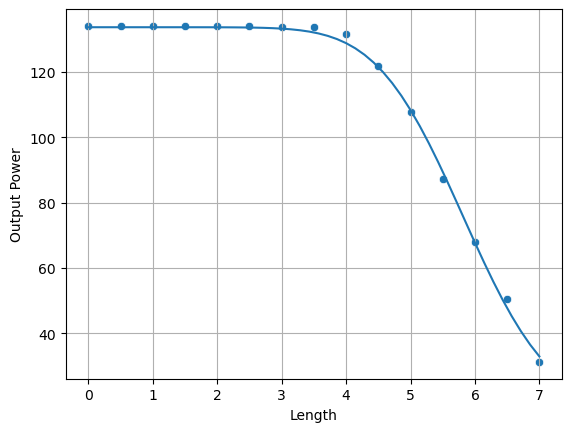

' $ f(x,a,b,c) = 133.7 \\left(1- \x0crac{1}{2} \\int_0^x a\\,e^{-b\\,(t-c)^2}\\,dt \right) $ '

array([0.6571326 , 0.45229477, 5.816183  ])

In [9]:
leng = df21032['Length'].to_numpy()
Pout = df21032['Output Power'].to_numpy()

p_opt, p_err = curve_fit(fitfn21032, leng, Pout, p0=[1,1,6])
a1,b1,c1 = p_opt

so.scatterplot(data=df21032, x='Length', y='Output Power')
leng1 = np.linspace(leng.min(),leng.max(), 50)
plt.plot(leng1, fitfn21032(leng1, a1,b1,c1))
plt.grid()
plt.show()
display(fitfn21032.__doc__, p_opt)

In [10]:
df21033 = pd.read_excel('SINP_proj_data.xlsx', sheet_name='2103_2_2')
display(df21033)

,Length,Output Power
0,0.0,133.700
1,0.5,133.300
2,1.0,129.700
3,1.5,119.200
4,2.0,104.300
5,2.5,84.600
6,3.0,66.200
7,3.5,48.600
8,4.0,29.660
9,4.5,15.730


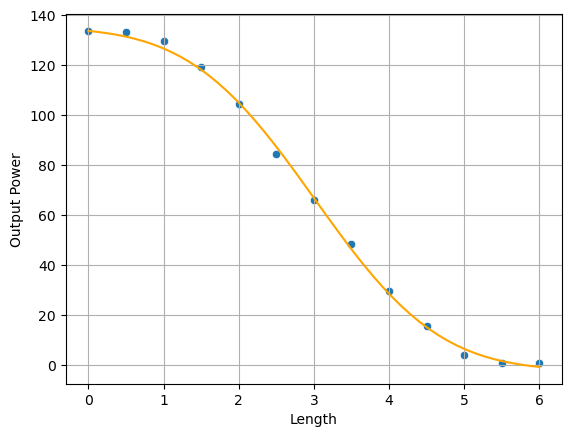

' $ f(x,a,b,c) = 133.7 \\left(1- \x0crac{1}{2} \\int_0^x a\\,e^{-b\\,(t-c)^2}\\,dt \right) $ '

array([0.62818214, 0.29391461, 3.00999609])

In [11]:
leng = df21033['Length'].to_numpy()
Pout = df21033['Output Power'].to_numpy()

p_opt, p_err = curve_fit(fitfn21032, leng, Pout, p0=[1,1,3])
a1,b1,c1 = p_opt

so.scatterplot(data=df21033, x='Length', y='Output Power')
leng1 = np.linspace(leng.min(),leng.max(), 50)
plt.plot(leng1, fitfn21032(leng1, a1,b1,c1), 'orange')
plt.grid()
plt.show()
display(fitfn21032.__doc__, p_opt)

## 21.03.2024 - Intensity Profile

In [12]:
df21034 = pd.read_excel('SINP_proj_data.xlsx', sheet_name='2103_3')
display(df21034)

,Pos X [µm],X Value [%],Pos Y [µm],Y Value [%]
0,-4500.000179,0.089609,-4498.800179,0.100459
1,-4498.800179,-0.553204,-4497.600179,0.143943
2,-4497.600179,-0.932696,-4496.400179,0.001068
3,-4496.400179,-0.204691,-4495.200179,-0.502100
4,-4495.200179,0.081864,-4494.000179,-0.179079
...,...,...,...,...
7495,4494.000179,0.105098,4495.200179,-0.402709
7496,4495.200179,0.484590,4496.400179,-0.570432
7497,4496.400179,0.422633,4497.600179,-0.849970
7498,4497.600179,-0.266649,4498.800179,-0.756790


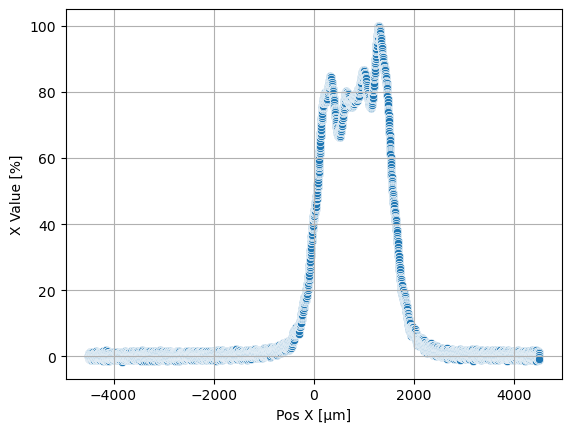

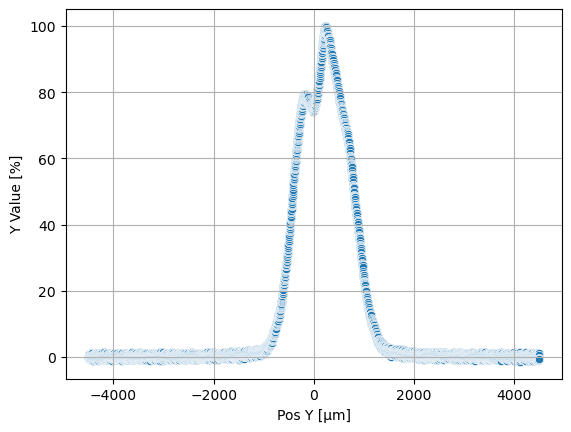

In [13]:
so.scatterplot(data=df21034, x='Pos X [µm]', y='X Value [%]')
plt.grid()
plt.show()

so.scatterplot(data=df21034, x='Pos Y [µm]', y='Y Value [%]')
plt.grid()
plt.show()

Fitting function: Trying a Gaussian function here -
$$ f(x, \mu,\sigma) = 100 \,\exp(-\frac{(x-\mu)^2}{2\sigma^2}) $$

In [14]:
def fitfn21034(x, mu, sig):
    '''$ f(x, \mu,\sigma) = 100 \,\exp(-\frac{(x-\mu)^2}{2\sigma^2}) $'''
    return 100*np.exp(-(x-mu)**2/(2*sig**2))

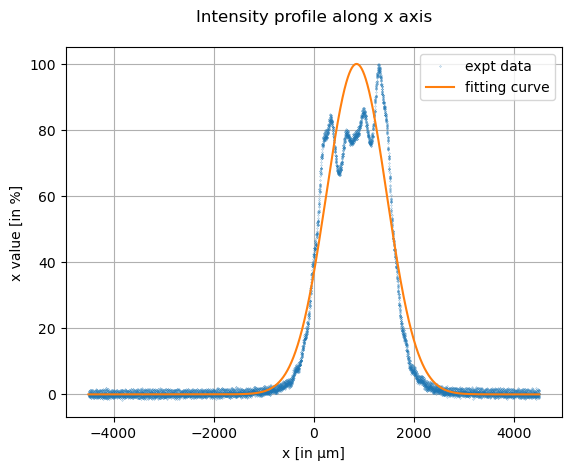

'$ f(x, \\mu,\\sigma) = 100 \\,\\exp(-\x0crac{(x-\\mu)^2}{2\\sigma^2}) $'

array([850.20622064, 602.24973688])

In [15]:
xpos = df21034['Pos X [µm]'].to_numpy()
xval = df21034['X Value [%]'].to_numpy()

p_opt, p_err = curve_fit(fitfn21034, xpos, xval, p0=[1000, 1000])
mu1, sig1 = p_opt
plt.plot(xpos, xval, 'o', ms=0.2, label='expt data')
plt.plot(xpos, fitfn21034(xpos, mu1, sig1), label='fitting curve')
plt.legend()
plt.title('Intensity profile along x axis\n')
plt.xlabel('x [in µm]')
plt.ylabel('x value [in %]')
plt.grid()
plt.show()
display(fitfn21034.__doc__, p_opt)
x_spread = 2*sig1

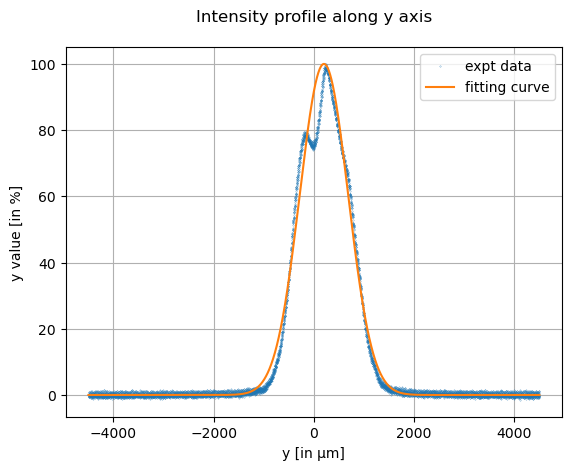

'$ f(x, \\mu,\\sigma) = 100 \\,\\exp(-\x0crac{(x-\\mu)^2}{2\\sigma^2}) $'

array([200.76621214, 482.37717581])

In [16]:
ypos = df21034['Pos Y [µm]'].to_numpy()
yval = df21034['Y Value [%]'].to_numpy()

p_opt, p_err = curve_fit(fitfn21034, ypos, yval, p0=[0, 2000])
mu1, sig1 = p_opt
plt.plot(ypos, yval, 'o', ms=0.2, label='expt data')
plt.plot(ypos, fitfn21034(ypos, mu1, sig1), label='fitting curve')
plt.legend()
plt.title('Intensity profile along y axis\n')
plt.xlabel('y [in µm]')
plt.ylabel('y value [in %]')
plt.grid()
plt.show()
display(fitfn21034.__doc__, p_opt)
y_spread = 2*sig1

In [17]:
x_spread, y_spread

(1204.499473765241, 964.754351615691)